> This Jupyter Notebook contains the second part of the workshop, if you have not done the first one I invite you to do it before starting this one!

First of all, I hope you have understood the theoretical part of this workshop. Indeed, the latter will be very useful for this part! If you have any questions about the first part, this is the time to ask the supervisors.

You will need to create a modell predicting the garment on a 28 x 28 pixel image. You are free to create the model you want, I advise you to start with the simplest and improve it as you go along.

Obviously, I'm not going to let you start without a little help. Below you will find an incomplete code that will allow you to do this workshop. All you have to do is fill in the missing parts marked with comments starting with ###. You will also have to modify the hyper parameters (EPOCH, BATCH_SIZE, LR).

We will use the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), which contains standardised clothing images.

### It's up to you!

In [8]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        # Convolution layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.max_pool = nn.MaxPool2d(2, 2)
        # --------------------------------

        self.dropout = nn.Dropout(0.25)

        # Fully connected layer
        self.linear1 = nn.Linear(64 * 7 * 7, 128)
        self.linear2 = nn.Linear(128, 10)
        # --------------------------------

    def forward(self, x):
        # Enter your code here: you can use the functions above as a guide
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.max_pool(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.max_pool(x)

        x = self.dropout(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.softmax(x, dim=1)

        ### Don't forget the activation functions
        return x

In [10]:
network = NeuralNetwork()

For this exercise, we will use real data provided by FashionMNIST:

In [11]:
# Hyper parameters
EPOCH = 2
BATCH_SIZE = 64
LEARNING_RATE = 0.001

# Convert and normalize input images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load data
train_set = torchvision.datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

# Select a batch of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True)

# Define label names
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



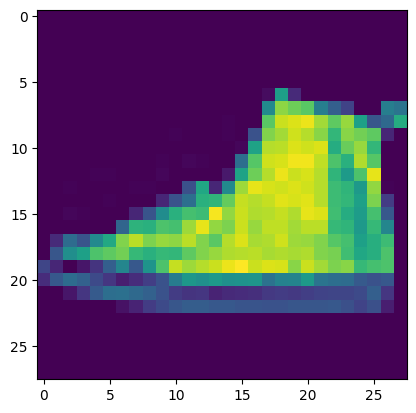

In [12]:
# Display the image passed as input to the model
def img_show(img):
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()


img_show(next(iter(train_loader))[0][0])

In [13]:
# Load a loss calculator and optimizer
### Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [14]:
iteration = 0

train_accuracies = np.zeros(EPOCH)
test_accuracies = np.zeros(EPOCH)

for iteration in range(EPOCH):
    average_loss = 0.0

    print("――――――――――――――――――――――――――――――――――――――――――――――――――")

    # Training
    total = 0
    success = 0
    for inputs, labels in tqdm(train_loader):
        # Enter your code here: ~ 5 lines of code
        optimizer.zero_grad()
        output = network.forward(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        ###
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        success += (predicted == labels.data).sum()

    train_accuracies[iteration] = 100.0 * success / total
    # -------------------------------------------------------------------

    # Testing
    total = 0
    success = 0
    for inputs, labels in tqdm(test_loader):
        output = network.forward(inputs)

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        success += (predicted == labels.data).sum()
    test_accuracies[iteration] = 100.0 * success / total
    # -------------------------------------------------------------------

    print("Epoch %d, train accuracy %d, test accuracy %d" % (
        iteration,
        train_accuracies[iteration],
        test_accuracies[iteration]
    ))

――――――――――――――――――――――――――――――――――――――――――――――――――


100%|██████████| 157/157 [00:08<00:00, 18.36it/s]


Epoch 0, train accuracy 68, test accuracy 78
――――――――――――――――――――――――――――――――――――――――――――――――――


100%|██████████| 157/157 [00:08<00:00, 18.18it/s]

Epoch 1, train accuracy 80, test accuracy 81


### Improvements

Can you make the model work? Have you managed to create a basic model but don't know how to improve it? This part is for you!

1. You process images, have you used convolutions? [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)
2. Did you use the pooling operation after your convolution? [MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)
3. Have you used the dropout to avoid overfitting? [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)
4. Have you tested other activation functions?

Now that you're proud of your model, don't hesitate to share it with others! Also, feel free to compare your models to see what works well!